In [1]:
# storing and analysis
import numpy as np
import pandas as pd
from scipy.integrate import odeint

# visualization
import matplotlib.pyplot as plt

In [2]:
def RHS1(y, t, R0, sigma, gamma):
    S, E, I, R = y
    beta = gamma*R0
    dydt = [- beta*S*I, beta*S*I - sigma*E, sigma*E - gamma*I, gamma*I]
    return dydt

def makeIC(i0):
    return [1 - 5*i0, 4*i0, i0, 0]

In [3]:
def MakeSoln1(R0):
    y0 = makeIC(1e-7)
    sigma= 1/5.2
    gamma = 1/18
    t = np.linspace(0,900,900)
    
    return odeint(RHS1, y0, t, args=(R0,sigma,gamma))

In [6]:
#list of values of R0
my_R0 = np.linspace(1.6,3.0,8)

# construct solutions for all values of R0
AllSolns1 = [ MakeSoln1(my_R0[i]) for i in range(len(my_R0)) ]

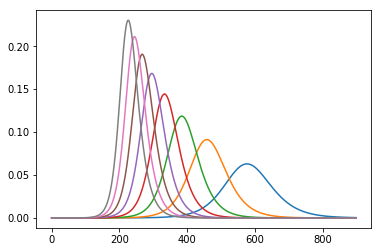

In [23]:
# infected vs time
for i in range(len(my_R0)):
    plt.plot(AllSolns1[i][:,2]);

In [24]:
def RHS2(y, t, eta, sigma, gamma):
    S, E, I, R = y
    R0 = 3
    Rbar = 1.6
    # this function controls the infection rate
    Rt = R0 * np.exp(- eta * t) + (1. - np.exp(- eta *t) )*Rbar
    beta = gamma*Rt
    dydt = [- beta*S*I, beta*S*I - sigma*E, sigma*E - gamma*I, gamma*I]
    return dydt

In [42]:
def MakeSoln2(eta):
    y0 = makeIC(1e-7)
    sigma= 1/5.2
    gamma = 1/18
    t = np.linspace(0,900,900)
    
    return odeint(RHS2, y0, t, args=(eta,sigma,gamma))

In [43]:
my_eta = np.array([1/5, 1/10, 1/20, 1/50, 1/100])

# construct solutions for all values of R0
AllSolns2 = [MakeSoln2(my_eta[i]) for i in range(len(my_eta)) ]

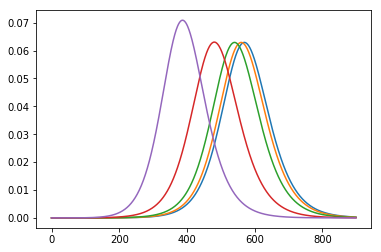

In [45]:
# infected vs time
for i in range(len(my_eta)):
    plt.plot( AllSolns2[i][:,2]);